# Лабораторная работа 1, Северилов Павел М05-004
## Уточнение ранговых экспертных оценок с использованием изотонической регрессии (ранжирование объектов на основе экспертных оценок.)

* **Задача**: получить рейтинг продуктов, основанный на экспертной оценке и на признаках продуктов.
* **Модель решения**: изотоничесĸая, ранговая регрессия

#### Введение

Интегральный индикатор – это число, поставленное в соответствие объекту, и рассматриваемое как оценка его качества.
Каждый объект описан набором признаков: к каждому продукту заданы значения **признаков калорийность, цена, жиры, белки, углеводы**

Одним из подходов с учителем построения интегральных индикаторов является изотоническая регрессия. Изотоническая регрессия находит неубывающее приближение функции, минимизируя среднеквадратичную ошибку обучающих данных.

Метод согласования экспертных данных заключается в том, что отыскивается вектор с монотонной последовательностью координат, наиболее близкий к заданному экспертами.


#### Интегральные индикаторы, экспертные оценки
Задана матрица описаний объектов $X = \{x_{ij}\}^{m,n}_{i=1,j=1}$. 
Вектор $x_i = (x_{i1}, x_{i2}, \cdots, x_{in})$ −
описание i−го объекта.

Интегральный индикатор — линейная комбинация вида
$$
y_{i}=\sum_{j=1}^{n} w_{j} g_{j}\left(x_{i j}\right)
$$

где $g_j$ — функция приведения показателей в единую шкалу, например:

$$
g_{j}: x_{i j} \mapsto(-1)^{\zeta_{j}} \frac{x_{i j}-\min _{i} x_{i j}}{\max _{i} x_{i j}-\min _{i} x_{i j}}+\zeta_{j}
$$

Параметр $\zeta_{j}$ назначается равным 1, если оптимальное значение показателя минимально, и 0 иначе. Будем обозначать
теперь за X приведенную таким способом матрицу «объекты-признаки». Таким образом, интегральные индикаторы
$$y=Xw$$
Заданы в ранговых шкалах экспертные оценки: $y_0$

#### Постановка задачи согласования экспертных оценок с использованием изотонической регрессии.

Пусть $y_0$ — заданное экспертами начальное приближение вектора $y$. Вектор, наиболее близкий в пространстве весов признаков к $y_0$, в смысле наименьших квадратов:
$$
\begin{array}{c}
\tilde{\mathbf{w}}=X^{+} \mathbf{y}_{0}, \text { где } \\
X^{+}=\left(X^{T} X\right)^{-1} X^{T}
\end{array}
$$
Требуется найти такую монотонную последовательность $w_1 \le \cdots \le w_n$, что она лучше всего приближает вектор $\widetilde{w}$ в смысле среднего квадрата ошибки:
$$
\left\{\begin{array}{l}
\widehat{\mathbf{w}}=\arg \min _{w \in \mathbb{R}^{n}} \sum_{j=1}^{n}\left(\widetilde{w}_{j}-w_{j}\right)^{2} \\
w_{1} \leqslant \ldots \leqslant w_{n}
\end{array}\right.
$$

Однако, чтобы получить согласованные экспертные оценки, введем в модель гиперпараметр. С его помощью мы сможем варьировать нашу «степень доверия» от экспертных оценок весов признаков (то есть, монотонной последовательности $w_1 \le \cdots \le w_n$) к экспертным оценкам интегральных индикаторов (вектору $\widehat{\mathbf{w}}$).
Таким образом, требуется найти такой вектор $\widehat{\mathbf{w}}$, что:

$$
\widehat{\mathbf{w}}=\arg \min _{\mathbf{w} \in \mathbb{R}^{n}}\left(\frac{1}{2} \sum_{j=1}^{n}\left(\widetilde{w}_{j}-w_{j}\right)^{2}+\lambda \sum_{j=1}^{n-1}\left(w_{j}-w_{j+1}\right)_{+}\right)
$$

Тогда результирующие интегральные индикаторы:
$$y_{exp} = X\widehat{\mathbf{w}}$$

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn import preprocessing

In [2]:
products = ['Устрицы', 
            'Арахиc соленый',
            'Молоко',
            'Макароны',
            'Овсяное молоко', 
            'Шоколад', 
            'Сырок',
            'Кефир',
            'Гречневая крупа',
            'Каша Геркулес']

X_ = np.array([[72, 85, 9, 2, 4.4],
               [640, 69, 25, 52, 17],
               [42, 5.9, 3.4, 2.5, 5],
               [371,34,3.6, 0.4, 20],
               [250, 8, 1, 3.2, 6.5],
               [545, 100, 5, 33, 56.5],
               [360.7, 35.6, 7.7, 19.1, 39.5],
               [57, 5.9, 3, 3.2, 4],
               [334, 4, 12, 2, 67],
               [365, 16, 12, 1.3, 59]])

X_normalized = preprocessing.normalize(X_, norm='l2')

In [3]:
y_0 = [7, 4, 6, 5, 8, 2, 9, 1, 3, 10]
X_plus = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T
w_tilda = X_plus @ y_0

In [4]:
X = np.mean(X_normalized, axis=0)

In [5]:
ir = IsotonicRegression()
w_hat = ir.fit_transform(X, w_tilda)

y_ = ss.rankdata(X_normalized @ w_hat)

In [6]:
y_

array([ 7.,  1.,  4., 10.,  6.,  3.,  5.,  2.,  8.,  9.])

In [7]:
y_0

[7, 4, 6, 5, 8, 2, 9, 1, 3, 10]

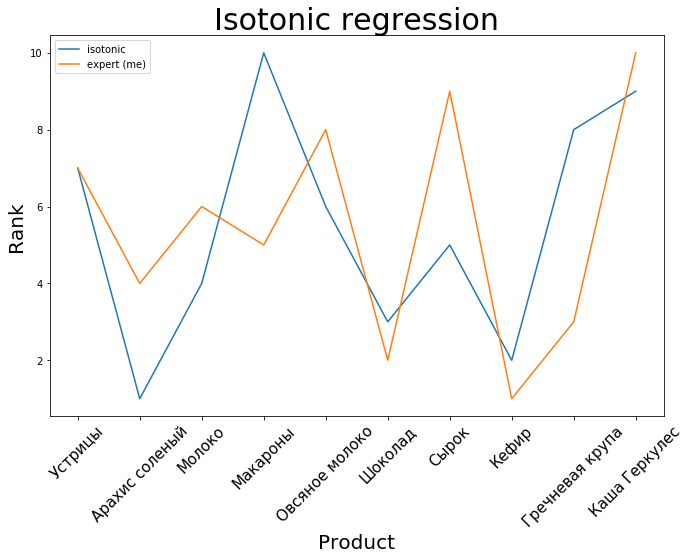

In [8]:
fig = plt.figure(figsize=(11,7))
plt.xlabel('Product', fontsize=20)
plt.ylabel('Rank', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.plot(products, y_, label='isotonic')
plt.plot(products, y_0, label='expert (me)')
plt.legend()
plt.title('Isotonic regression', fontsize=30)
plt.show()

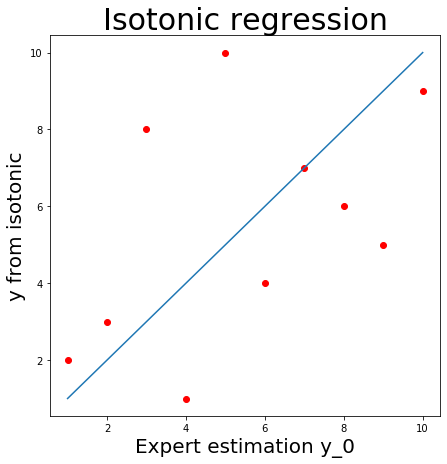

In [18]:
fig = plt.figure(figsize=(7,7))
plt.xlabel('Expert estimation y_0', fontsize=20)
plt.ylabel('y from isotonic', fontsize=20)
plt.plot(y_0, y_, 'ro')
plt.plot(np.arange(1, 11), np.arange(1, 11))
plt.title('Isotonic regression', fontsize=30)
plt.show()

In [16]:
print('Рейтинг продуктов после уточнения ранговых оценок')
np.concatenate((np.array(products).reshape(10, 1), np.array(y_).reshape(10, 1)), axis=1)

Рейтинг продуктов после уточнения ранговых оценок


array([['Устрицы', '7.0'],
       ['Арахиc соленый', '1.0'],
       ['Молоко', '4.0'],
       ['Макароны', '10.0'],
       ['Овсяное молоко', '6.0'],
       ['Шоколад', '3.0'],
       ['Сырок', '5.0'],
       ['Кефир', '2.0'],
       ['Гречневая крупа', '8.0'],
       ['Каша Геркулес', '9.0']], dtype='<U32')

In [17]:
print('Рейтинг продуктов эксперта')
np.concatenate((np.array(products).reshape(10, 1), np.array(y_0).reshape(10, 1)), axis=1)

Рейтинг продуктов эксперта


array([['Устрицы', '7'],
       ['Арахиc соленый', '4'],
       ['Молоко', '6'],
       ['Макароны', '5'],
       ['Овсяное молоко', '8'],
       ['Шоколад', '2'],
       ['Сырок', '9'],
       ['Кефир', '1'],
       ['Гречневая крупа', '3'],
       ['Каша Геркулес', '10']], dtype='<U21')